In [22]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Dropout,Flatten,Dense
from tensorflow.keras.models import Sequential,Model
from glob import glob
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

In [23]:
mask_array = [x for x in glob('/content/drive/My Drive/mask dataset/Testing/masked/*')]
normal_array = [x for x in glob('/content/drive/My Drive/mask dataset/Testing/not masked/*')]

In [24]:
mask_array = mask_array[:5]
mask_array

['/content/drive/My Drive/mask dataset/Testing/masked/39.jpg',
 '/content/drive/My Drive/mask dataset/Testing/masked/12.jpg',
 '/content/drive/My Drive/mask dataset/Testing/masked/37.jpg',
 '/content/drive/My Drive/mask dataset/Testing/masked/5.jpg',
 '/content/drive/My Drive/mask dataset/Testing/masked/14.jpg']

In [25]:
normal_array = normal_array[:5]
normal_array

['/content/drive/My Drive/mask dataset/Testing/not masked/masked29.jpg',
 '/content/drive/My Drive/mask dataset/Testing/not masked/masked26.jpg',
 '/content/drive/My Drive/mask dataset/Testing/not masked/masked1.jpg',
 '/content/drive/My Drive/mask dataset/Testing/not masked/masked10.jpg',
 '/content/drive/My Drive/mask dataset/Testing/not masked/masked27.jpg']

In [26]:
normal_array

['/content/drive/My Drive/mask dataset/Testing/not masked/masked29.jpg',
 '/content/drive/My Drive/mask dataset/Testing/not masked/masked26.jpg',
 '/content/drive/My Drive/mask dataset/Testing/not masked/masked1.jpg',
 '/content/drive/My Drive/mask dataset/Testing/not masked/masked10.jpg',
 '/content/drive/My Drive/mask dataset/Testing/not masked/masked27.jpg']

In [27]:
from IPython.display import Image
import matplotlib.image as mpimg

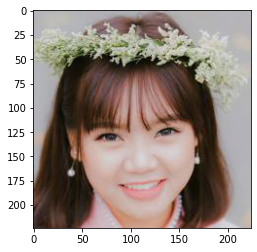

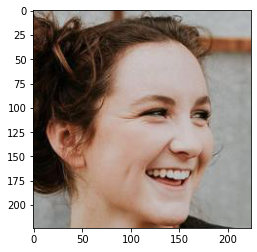

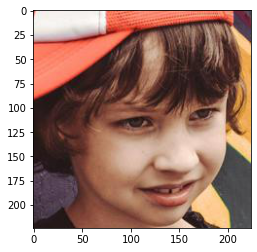

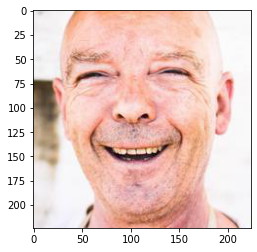

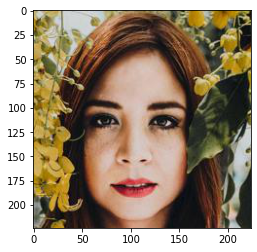

In [28]:
for i in normal_array:  
  img=mpimg.imread(i)
  imgplot = plt.imshow(img)
  plt.show()

In [30]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape = [224,224,3]))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1024,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(2,activation = 'softmax'))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 220, 220, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 110, 110, 32)      128       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 108, 108, 64)      18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 106, 106, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 53, 53, 64)       

In [40]:
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [41]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range = 0.2,
                                   shear_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [42]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/mask dataset/Training',
                                                 target_size = (224,224),
                                                 class_mode = 'categorical',
                                                 batch_size = 32)
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/mask dataset/Testing',
                                            target_size = (224,224),
                                            class_mode = 'categorical',
                                            batch_size = 32)

Found 727 images belonging to 2 classes.
Found 147 images belonging to 2 classes.


In [43]:
r = model.fit_generator(training_set,
                        steps_per_epoch = len(training_set),
                        epochs = 50,
                        validation_data = test_set,
                        validation_steps = len(test_set))

Epoch 1/50
23/23 [==============================] - 13s 563ms/step - loss: 0.6043 - accuracy: 0.8487 - val_loss: 0.8374 - val_accuracy: 0.8163
Epoch 2/50
23/23 [==============================] - 14s 594ms/step - loss: 0.3785 - accuracy: 0.8721 - val_loss: 3.0172 - val_accuracy: 0.5306
Epoch 3/50
23/23 [==============================] - 14s 614ms/step - loss: 0.2536 - accuracy: 0.9175 - val_loss: 5.0527 - val_accuracy: 0.5170
Epoch 4/50
23/23 [==============================] - 14s 610ms/step - loss: 0.2466 - accuracy: 0.9078 - val_loss: 2.7432 - val_accuracy: 0.5102
Epoch 5/50
23/23 [==============================] - 14s 617ms/step - loss: 0.1937 - accuracy: 0.9271 - val_loss: 4.9225 - val_accuracy: 0.4830
Epoch 6/50
23/23 [==============================] - 14s 602ms/step - loss: 0.2574 - accuracy: 0.9010 - val_loss: 0.2473 - val_accuracy: 0.9456
Epoch 7/50
23/23 [==============================] - 14s 624ms/step - loss: 0.2500 - accuracy: 0.9175 - val_loss: 1.7245 - val_accuracy: 0.7347

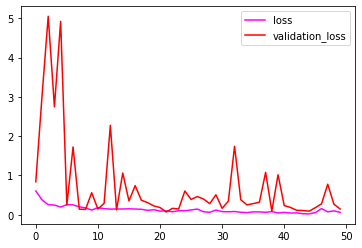

In [47]:
plt.plot(r.history['loss'],label = 'loss',color = 'magenta')
plt.plot(r.history['val_loss'],label = 'validation_loss',color = 'red')
plt.legend()
plt.show()

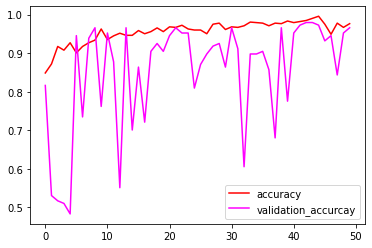

In [48]:
plt.plot(r.history['accuracy'],label = 'accuracy',color = 'red')
plt.plot(r.history['val_accuracy'],label = 'validation_accurcay',color = 'magenta')
plt.legend()
plt.show()

In [50]:
predict = load_img('/content/drive/My Drive/mask dataset/valid/asian_mask101.jpg',target_size=(224,224))
x = image.img_to_array(predict)
z = np.expand_dims(x,axis = 0)
result = model.predict(z)
#final = np.argmax(result, axis=1)
if result[0][0]== 1:
  print('Person is wearing the mask')
else:
  print('Person is not wearning the mask')

Person is wearing the mask


In [51]:
validate_list = [x for x in glob('/content/drive/My Drive/mask dataset/valid/*')]
predicted_labels = []
for i in validate_list:
  predict = load_img(i,target_size=(224,224))
  x = image.img_to_array(predict)
  z = np.expand_dims(x,axis = 0)
  result = model.predict(z)
  if result[0][0] == 1:
    predicted_labels.append('Person is Wearning mask')
  else:
    predicted_labels.append('Person is not Wearning mask')

In [52]:
predicted_labels

['Person is Wearning mask',
 'Person is Wearning mask',
 'Person is Wearning mask',
 'Person is Wearning mask',
 'Person is Wearning mask',
 'Person is not Wearning mask',
 'Person is Wearning mask',
 'Person is Wearning mask',
 'Person is not Wearning mask',
 'Person is Wearning mask',
 'Person is Wearning mask',
 'Person is Wearning mask',
 'Person is not Wearning mask',
 'Person is Wearning mask',
 'Person is Wearning mask',
 'Person is Wearning mask',
 'Person is Wearning mask',
 'Person is Wearning mask',
 'Person is Wearning mask',
 'Person is Wearning mask',
 'Person is not Wearning mask',
 'Person is Wearning mask',
 'Person is Wearning mask',
 'Person is Wearning mask',
 'Person is Wearning mask',
 'Person is Wearning mask',
 'Person is Wearning mask',
 'Person is Wearning mask',
 'Person is Wearning mask',
 'Person is Wearning mask',
 'Person is Wearning mask',
 'Person is Wearning mask',
 'Person is not Wearning mask',
 'Person is Wearning mask',
 'Person is Wearning mask',


In [54]:
validate_list_1 = validate_list[0:31]

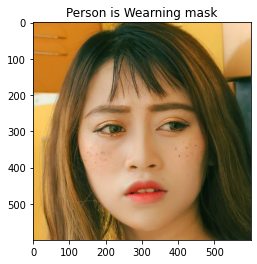

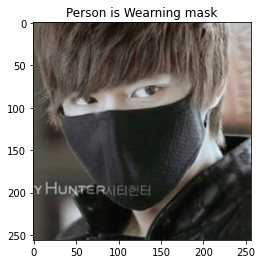

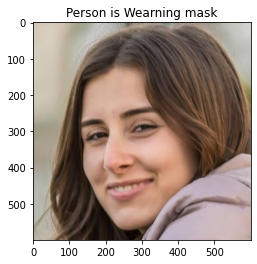

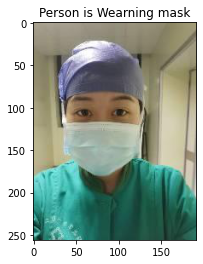

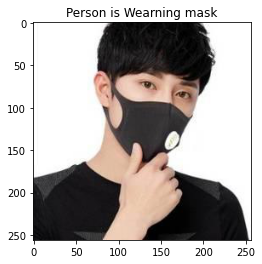

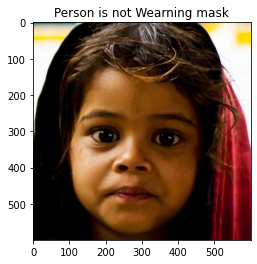

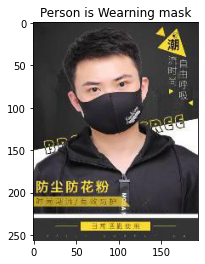

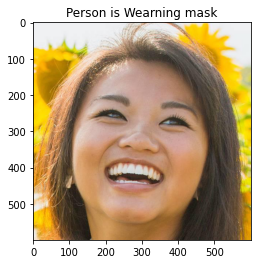

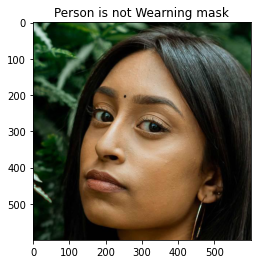

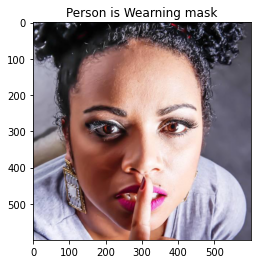

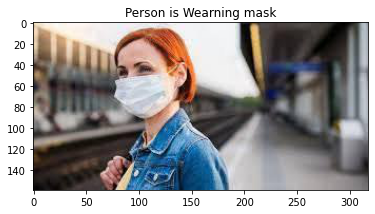

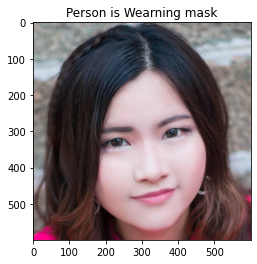

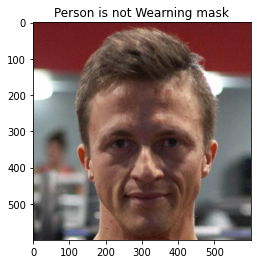

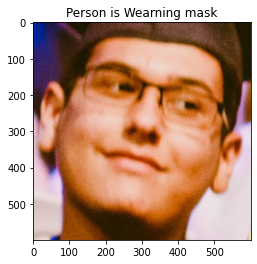

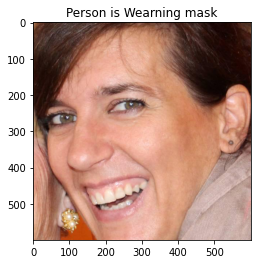

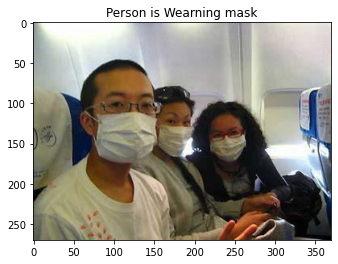

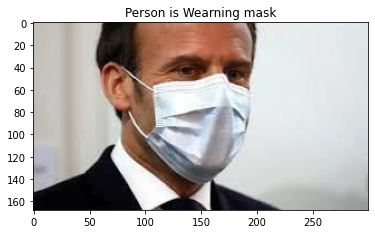

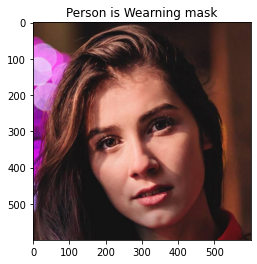

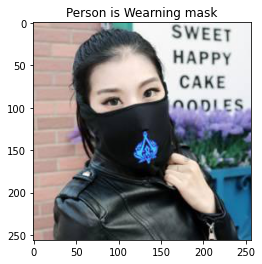

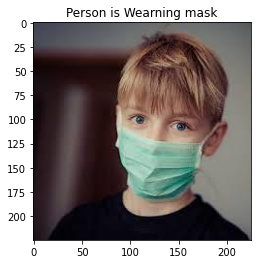

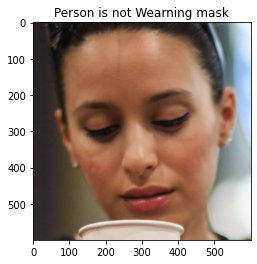

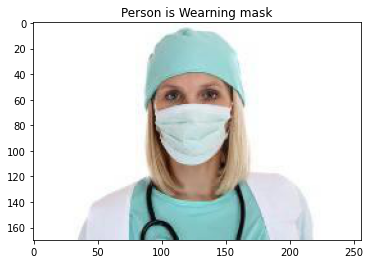

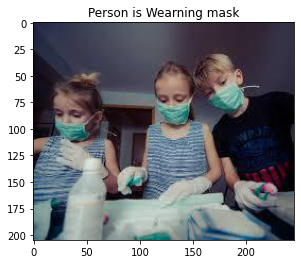

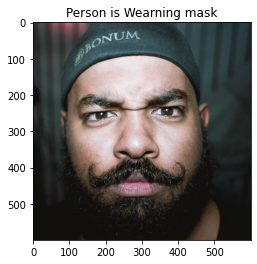

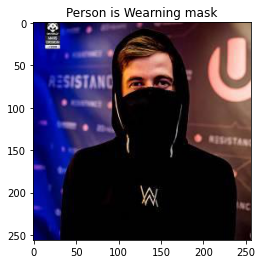

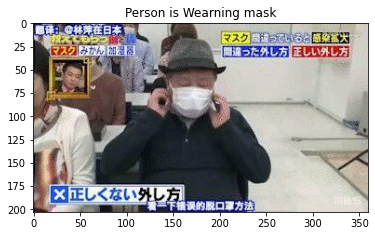

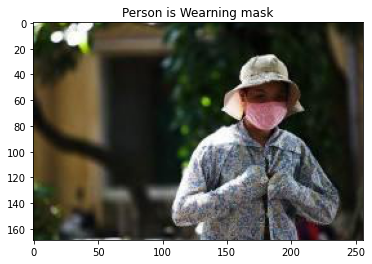

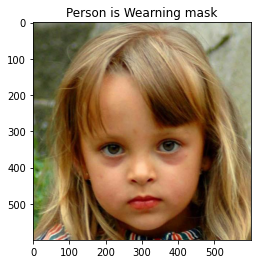

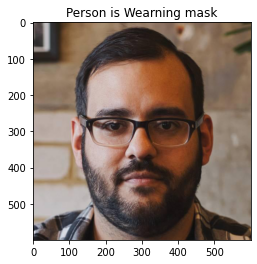

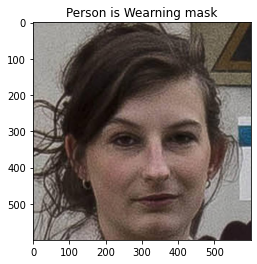

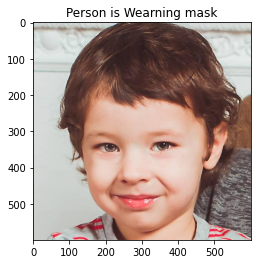

In [64]:
for i,j in zip(validate_list_1,predicted_labels):
  img = mpimg.imread(i)
  imgplot = plt.imshow(img)
  plt.title(j)
  plt.show()
  

